# **Домашнее задание №1**
# **"Моделирование распределения давления в нагнетательной скважине"**
**Вариант 6**

Выполнила Жарова Ольга

# Расчет распределения давления в нагнетательной скважине. Описание алгоритма

Динамическое забойное давление в нагнетательной скважине может быть получено при помощи уравнения Дарси-Вейсбаха

$$P_{wf} = P_{wh} + \xi \left [ \rho g L \cos \alpha  - \frac{8}{\pi^2} \frac{ f \rho }{ d^5} q ^ 2 L \right ] $$

$P$ - давление

$P_{wf}$ - забойное давление

$P_{wh}$ - устьевое давление

$\rho$ - плотность воды, кг/м3

$g$ - ускорение свободного падения, кг/м/с2

$\alpha$ - угол отклонения скважины от вертикали, рад

$L$ - измеренная длина скважины, м

$d$ - диаметр скважины, м

$q$ - дебит закачиваемой жидкости, м3/сек

$\mu$ - вязкость динамическая, мПа с

$T$ - температура, К

$\xi$ - размерный коэффициент зависящий от выбора системы единиц. При использовании единиц давления в $МПа$ $\xi = \frac{1}{10^6}$, при использовании единиц давления в $бар$ $\xi = \frac{1}{10^5}$.

Градиент давления для произвольного участка скважины можно записать в виде

$$ \frac{dP}{dL} = \xi \left [ \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2 \right ] $$

Что

Таблица параметров и единиц измерения

|Параметр | СИ   | Практические метрические  | Промыслоавые американские    |
|------   |:------:|:------: |:------:|
|Давление |$Па$    | $Атм$ | $psi$  |
|Температура |${^\circ K}$    | ${^\circ C}$  | ${^\circ F}$  |
|Плотность |$кг / м^3$    | $кг / м^3$ | $кг / м^3$  |
|Ускорение свободного падения |$м / с^2$    | $м / с^2$ | $м / с^2$  |
|Длина |$м$    | $м$ | $ft $ |
|Дебит |$м^3 / с$   | $м^3 / сут$ | $bbl / day$  |
|Вязкость |$Па \cdot с$    | $сП$ | $сП$ |


## Корреляция для плотности воды
Плотность воды существенно зависит от количества растворенных в воде солей. При известной солености воды $w_s$ плотность воды в стандартных условиях может быть определена по корреляции

$$\rho_w (P_{sc}, T_{sc} ) = (1,0009 - 0.7114 W_s + 0.2605 * W_s ^2) ^ {-1} $$

А изменение плотность воды с изменение температуры может быть рассчитано по выражению

$$\rho_w (P, T ) = \frac{\rho_w (P_{sc}, T_{sc} )} {1+ \frac{ T-273}{10000}(0.269 (T-273)^{0.637}-0.8)} $$

Влиянием давления на плотность воды (сжимаемостью) можно пренебречь. Сжимаемость воды составляет около $4.5 \cdot 10^{-5} \frac{1}{bar} $. При изменении давления в 100 раз (с 1 до 100) плотность воды изменится примерно на 0.05%.

[Соленость](https://en.wikipedia.org/wiki/Salinity) (массовая доля солей) определяется как  $$W_s = \frac{m_s}{m_s+m_w}$$

$m_s$ - масса солей, г

$m_w$ - масса воды, г

Часто определяется от отношение солей в граммка к массе воды в килограммах (или грамм на литр). Иногда встречаются значения солености в частицах на миллион (ppm) или в процентах.

$$1 \% = 0.01 \left [ \frac{г}{г}   \right ] = 10  \left [ \frac{г}{кг} \right ] = 10  \left [ \frac{г}{л} \right ] = 10000  \left [ ppm \right ]$$


Типичные значения солености составляют

| Вода | Соленость, г/г   |
|------|------|
|   чистая   | 0.00001-0.001|
|   морская вода   | 0.035|
|   вода мертвого моря   | >0.2|

Часто на промысле значение солености не известно (не содержится в базе данных), удобнее бывает ориентироваться на плотность воды в стандартных условиях.
При известной плотности воды в стандартных условиях значение солености можно оценить из выражения (обратного выражению для плотности)

$$ W_s = \frac{1}{\rho_w}  \left( 1.36545 \rho_w - (3838.77 \rho_w - 2.009 \rho_w ^2 )^{0.5} \right) $$

Для $\rho_w > 992 \frac{кг}{м^3}$

## Корреляция для расчета вязкости воды

Вязкость воды может быть рассчитана по корреляции Matthews and Russel

$$ \mu_w= A  (1.8  T - 460) ^ {-B}  (0.9994 + 0.0058  P + 0.6534 \cdot  10 ^ {- 4} \cdot P^2 ) $$

где

$$A = 109.574 - 0.8406 \cdot 1000  W_s + 3.1331 \cdot 1000  W_s ^2 + 8.7221 \cdot 1000  W_s ^3$$

$$B = 1.1217 - 2.6396  W_s + 6.7946  W_s ^2 + 54.7119  W_s ^ 3 - 155.586  W_s ^4$$

## Число Рейнольдса

Число Рейнольдса определяется выражением

$$ Re = \frac{\rho V d}{\mu}$$

Для нагнетательной скважины диаметром 89 мм зависимость числа Рейнольдса от дебита приведена на рисунке в расчетной части. Видно, что уже при дебитах более 3 м3/сут $Re > 3000$ и поток будет турбулентным

## Коэффициент трения

Коэффициент трения Муди $f$ расчитывается для ламинарного потока по формуле

$$ f= \frac{64}{Re}, Re < 3000 $$

При закачке воды поток не бывает ламинарным (для НКТ с внутренним диаметром 89 мм дебит воды при котором нарушается ламинарность потока составляет около 3 м3/сут)
Для турбулентного режима течения $ Re > 3000 $ коэффициент трения Муди может быть рассчитан по Джейн (3. Swamee, P.K.; Jain, A.K. (1976). "Explicit equations for pipe-flow problems". Journal of the Hydraulics Division. 102 (5): 657–664)

$$ f = \frac{1} {\left [  1.14 - 2  \log \left ( \frac{ \epsilon} {d } + \frac{ 21.25}  { Re ^ {0.9} } \right ) \right ]  ^ 2} $$

или расчет может быть произведен для любых значений числа Рейнольдса $Re$ с использованием корреляции Черчилля (1974)

$$ f =  8  \left[ \left( \frac{8}{Re} \right ) ^{12} + \frac{1}{(A+B)^{1.5}} \right ] ^ {\frac{1}{12}} $$

где

$$ A = \left [- 2.457 \ln \left ( { \left(\frac{7}{Re} \right) ^{0.9} + 0.27 \frac{\epsilon} {d} } \right) \right ] ^{16} $$

$$ B = \left( \frac{37530}{Re} \right) ^{16}  $$

$\epsilon$ - шероховатость, м.

Для НКТ часто берут $\epsilon = 0.000018 м$. Вообще, диапазон изменения значений шероховатости $\epsilon = [0.000015 - 0.000045] м$

# Расчетная часть

In [105]:
# Загрузка библиотек необходимых для отрисовки графиков
import matplotlib
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint, solve_ivp
%matplotlib inline

In [106]:
def calc_ws(
        gamma_wat: float
) -> float:
    """
    Функция для расчета солесодержания в воде

    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.

    :return: солесодержание в воде, г/г
    """
    ws = (
            1 / (gamma_wat * 1000)
            * (1.36545 * gamma_wat * 1000 - (3838.77 * gamma_wat * 1000 - 2.009 * (gamma_wat * 1000) ** 2) ** 0.5)
    )
    # если значение отрицательное, значит скорее всего плотность ниже допустимой 992 кг/м3
    if ws > 0:
        return ws
    else:
        return 0


def calc_rho_w(
        ws: float,
        t: float
) -> float:
    """
    Функция для расчета плотности воды в зависимости от температуры и солесодержания

    :param ws: солесодержание воды, г/г
    :param t: температура, К

    :return: плотность воды, кг/м3
    """
    rho_w = 1000 * (1.0009 - 0.7114 * ws + 0.2605 * ws ** 2) ** (-1)

    return rho_w / (1 + (t - 273) * 1e-4 * (0.269 * (t - 273) ** 0.637 - 0.8))


def calc_mu_w(
        ws: float,
        t: float,
        p: float
) -> float:
    """
    Функция для расчета динамической вязкости воды по корреляции Matthews & Russel

    :param ws: солесодержание воды, г/г
    :param t: температура, К
    :param p: давление, Па

    :return: динамическая вязкость воды, сПз
    """
    a = (
            109.574
            - (0.840564 * 1000 * ws)
            + (3.13314 * 1000 * ws ** 2)
            + (8.72213 * 1000 * ws ** 3)
    )
    b = (
            1.12166
            - 2.63951 * ws
            + 6.79461 * ws ** 2
            + 54.7119 * ws ** 3
            - 155.586 * ws ** 4
    )

    mu_w = (
            a * (1.8 * t - 460) ** (-b)
            * (0.9994 + 0.0058 * (p * 1e-6) + 0.6534 * 1e-4 * (p * 1e-6) ** 2)
    )
    return mu_w


def calc_n_re(
        rho_w: float,
        q_ms: float,
        mu_w: float,
        d_tub: float
) -> float:
    """
    Функция для расчета числа Рейнольдса

    :param rho_w: плотность воды, кг/м3
    :param q_ms: дебит жидкости, м3/с
    :param mu_w: динамическая вязкость воды, сПз
    :param d_tub: диаметр НКТ, м

    :return: число Рейнольдса, безразмерн.
    """
    v = q_ms / (np.pi * d_tub ** 2 / 4)
    return rho_w * v * d_tub / mu_w * 1000


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff

def calc_ff_jain(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Jain

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    if n_re < 3000:
        ff = 64 / n_re
    else:
        ff = 1 / (1.14 - 2 * np.log10(roughness / d_tub + 21.25 / (n_re**0.9))) ** 2
    return ff

In [107]:
def calc_dp_dl_grav(rho_w: float, angle: float):
    """
    Функция для расчета градиента на гравитацию

    :param rho_w: плотность воды, кг/м3
    :param angle: угол наклона скважины к горизонтали, градусы

    :return: градиент давления на гравитацию в трубе, Па/м
    """
    dp_dl_grav = rho_w * 9.81 * np.sin(angle / 180 * np.pi)
    return dp_dl_grav

def calc_dp_dl_fric(
        rho_w: float,
        mu_w: float,
        q_ms: float,
        d_tub: float,
        roughness: float
):
    """
    Функция для расчета градиента давления на трение

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    if q_ms != 0:
        n_re = calc_n_re(rho_w, q_ms, mu_w, d_tub)
        ff = calc_ff_churchill(n_re, roughness, d_tub)
        dp_dl_fric = ff * rho_w * q_ms ** 2 / d_tub ** 5
    else:
        dp_dl_fric = 0
    return dp_dl_fric

def calc_dp_dl(
        rho_w: float,
        mu_w: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    """
    Функция для расчета градиента давления в трубе

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    dp_dl_grav = calc_dp_dl_grav(rho_w, angle)

    dp_dl_fric = calc_dp_dl_fric(rho_w, mu_w, q_ms, d_tub, roughness)

    dp_dl = dp_dl_grav - 0.815 * dp_dl_fric

    return dp_dl





## Графики функций

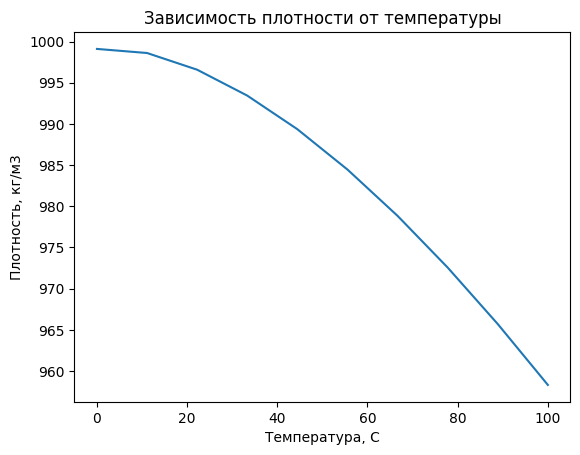

In [108]:
# построения графика функции зависимости плотности воды от температуры
x = np.linspace(0, 100, 10)                          # задание массива значений для построения графика
plt.plot(x, [calc_rho_w(0, t+273) for t in x])
plt.title('Зависимость плотности от температуры')
plt.ylabel("Плотность, кг/м3")
plt.xlabel("Температура, С")
plt.show()

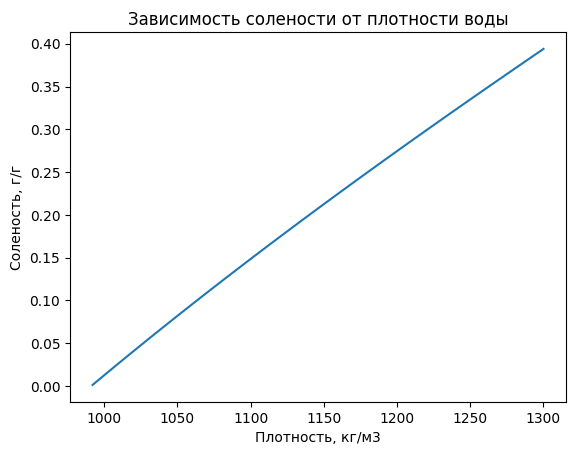

In [109]:
x = np.linspace(992, 1300, 50)                          # задание массива значений для построения графика
plt.plot(x, [calc_ws(gamma_wat/1000) for gamma_wat in x])
plt.title('Зависимость солености от плотности воды')
plt.ylabel("Соленость, г/г")
plt.xlabel("Плотность, кг/м3")
plt.show()

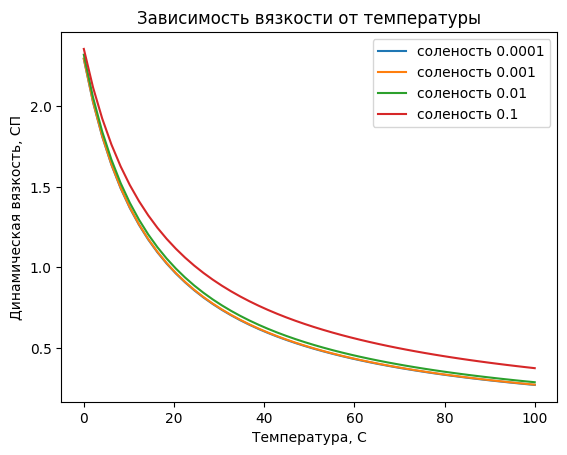

In [110]:
x = np.linspace(0, 100, 50)
plt.plot(x, [calc_mu_w(0.0001, t+273, 1*101325) for t in x], label = "соленость 0.0001")
plt.plot(x, [calc_mu_w(0.001, t+273, 1*101325) for t in x], label = "соленость 0.001")
plt.plot(x, [calc_mu_w(0.01, t+273, 1*101325) for t in x], label = "соленость 0.01")
plt.plot(x, [calc_mu_w(0.1, t+273, 1*101325) for t in x], label = "соленость 0.1")
plt.title('Зависимость вязкости от температуры')
plt.xlabel("Температура, С")
plt.ylabel("Динамическая вязкость, СП")
plt.legend()
plt.show()

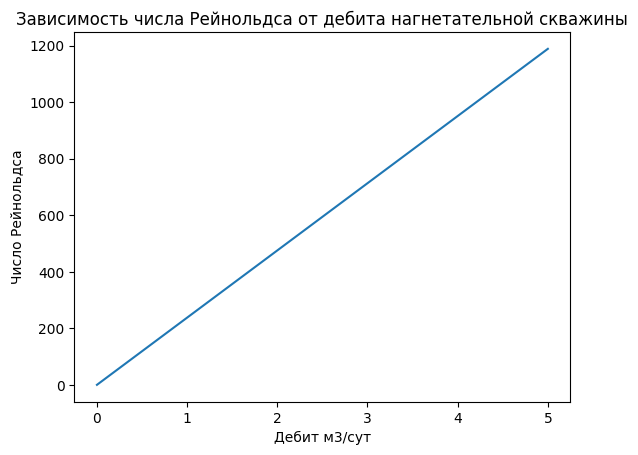

In [111]:
x = np.linspace(0, 5, 50)
plt.plot(x, [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x])
plt.title('Зависимость числа Рейнольдса от дебита нагнетательной скважины')
plt.ylabel("Число Рейнольдса")
plt.xlabel("Дебит м3/сут")
plt.show()

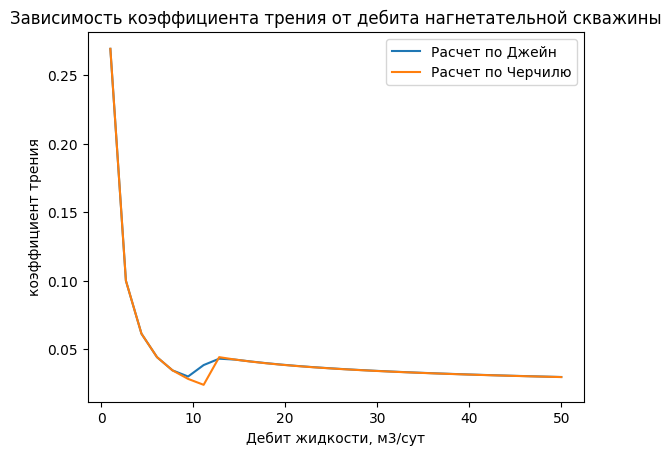

In [112]:
x = np.linspace(1, 50, 30)


n_re_list = [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x]

plt.plot(x, [calc_ff_churchill(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Джейн")
plt.plot(x, [calc_ff_jain(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Черчилю")
plt.title('Зависимость коэффициента трения от дебита нагнетательной скважины')
plt.xlabel("Дебит жидкости, м3/сут")
plt.ylabel("коэффициент трения")
plt.legend()
plt.show()

На графике зависимости коэффициента трения Муди показаны расчеты выполненные с использованием корреляций Джейна и Черчиля. Видно что корреляции хорошо совпадают друг с другом. Корреляция Черчиля описывает и ламинарный и турбулентный режимы работы

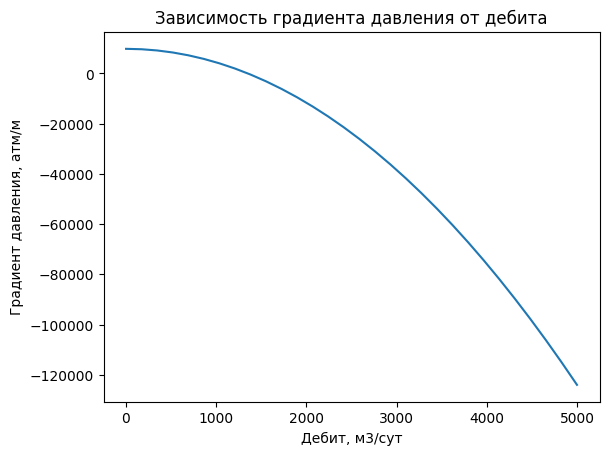

In [113]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl(rho_w=1000, mu_w=1, angle=90, q_ms=t/86400, d_tub=0.062, roughness=0.001) for t in x])
plt.title('Зависимость градиента давления от дебита')
plt.ylabel("Градиент давления, атм/м")
plt.xlabel("Дебит, м3/сут")
plt.show()

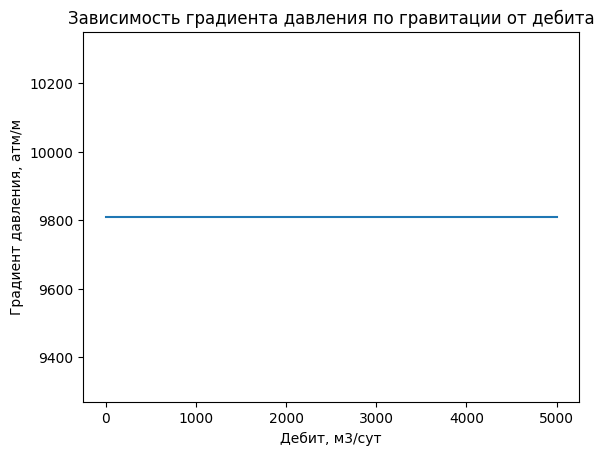

In [114]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl_grav(rho_w=1000, angle=90) for t in x])
plt.title('Зависимость градиента давления по гравитации от дебита')
plt.ylabel("Градиент давления, атм/м")
plt.xlabel("Дебит, м3/сут")
plt.show()

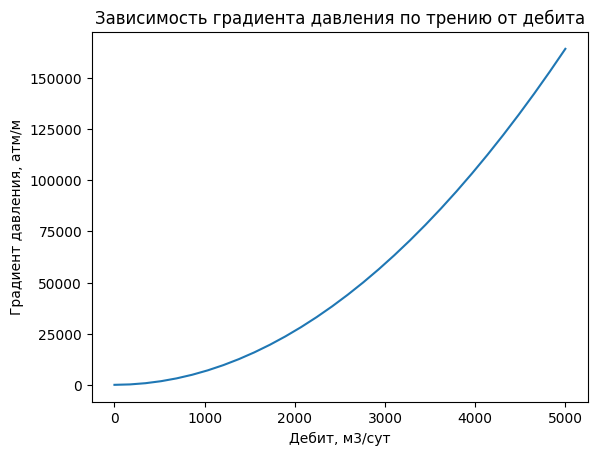

In [115]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl_fric(rho_w=1000, mu_w=1, q_ms=t/86400, d_tub=0.062, roughness=0.001) for t in x])
plt.title('Зависимость градиента давления по трению от дебита')
plt.ylabel("Градиент давления, атм/м")
plt.xlabel("Дебит, м3/сут")
plt.show()

# Расчет распределения давления
Для расчета необходимо задать исходные данные и перезапустить расчет

Решение уравнения на распределение давления и температуры в стволе скважины. Решается система двух уравнений вида

$$ \frac{dP}{dL} = \frac{1}{10^{-5}} \left [  \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2  \right ]  $$

$$ \frac{dT}{dL} = geograd $$

Граничные условия задаются на устье скважины


In [116]:
def __integr_func(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для интегрирования трубы

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м
"""
# Далвение и темп. кортеж
    p, t = pt
# Расчет физ.св-в воды(солесод.,плотность, вязкость, градиент давления(с учетом гравитации), темп. градиент)
    ws = calc_ws(gamma_wat)
    rho_w = calc_rho_w(ws, t)
    mu_w = calc_mu_w(ws, t, p)
    dp_dl = calc_dp_dl(rho_w, mu_w, angle, q_ms, d_tub, roughness)
    dT_dl = temp_grad * 1e-2

    return dp_dl, dT_dl

"""
    :return: градиенты давления, Па/м и температуры, К/м
    """


def calc_pipe(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для расчета давления в трубе

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление, Па и температура, K, глубины
    """
# Начальные условия
    y0 = [p_wh, t_wh]

    # Интегрирование системы уравнений от устья к забою
    sol = solve_ivp(
        lambda h, y: __integr_func(
            h=h,
            pt=y,
            temp_grad=temp_grad,
            gamma_wat=gamma_wat,
            angle=angle,
            q_ms=q_ms,
            d_tub=d_tub,
            roughness=roughness
        ),
        t_span=(h0, md_vdp),
        y0=y0,
        method="RK45",
        rtol=1e-6,
        atol=1e-3,
        max_step=10.0
    )

    # Проверка успешности решения
    if sol.status < 0 or len(sol.t) == 0:
        raise RuntimeError("Ошибка интегрирования: решение не получено")

    # Извлечение результатов
    h_res = sol.t
    p_res = sol.y[0]
    t_res = sol.y[1]

    return p_res, t_res, h_res


def calc_p_wf(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    """
    Функция для расчета забойного давления нагнетательной скважины

    :param p_wh: устьевое давление, Па
    :param t_wh: устьевая температура, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность воды, безразм.
    :param angle: угол наклона скважины, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: забойное давление, Па
    """
    p_res, t_res, h_res = calc_pipe(
        p_wh=p_wh,
        t_wh=t_wh,
        h0=h0,
        md_vdp=md_vdp,
        temp_grad=temp_grad,
        gamma_wat=gamma_wat,
        angle=angle,
        q_ms=q_ms,
        d_tub=d_tub,
        roughness=roughness
    )

    return float(p_res[-1])

In [117]:
import pandas as pd
input_data = {"gamma_water": 0.9623752846225958, "md_vdp": 2680.6008240290994, "d_tub": 0.07173080842176226, "angle": 70.06884382328695, "roughness": 0.0009251934024296495, "p_wh": 136.93138743581466, "t_wh": 30.71827805443803, "temp_grad": 2.241093100681135}
Q = 100 # дебит флюида, м3/cут
q_m3_sec = Q / 86400 # дебит флюида, м3/c
gamma_water = input_data["gamma_water"] # относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм
H = input_data["md_vdp"] # измеренная глубина забоя скважины
d_tub = input_data["d_tub"] # диаметр НКТ, м
angle = input_data["angle"] # угол наклона скважины к горизонтали, градусы
roughness = input_data["roughness"] # шероховатость трубы, м
p_wh = input_data["p_wh"] * 101325 # давление на устье, атм
t_wh = input_data["t_wh"] # температура на устье скважины, С
temp_grad = input_data["temp_grad"] # геотермический градиент, К/м * (1e-2)
#h0 = 0

df = pd.DataFrame(data = input_data, index=["Вариант 6"])
df


,gamma_water,md_vdp,d_tub,angle,roughness,p_wh,t_wh,temp_grad
Вариант 6,0.962375,2680.600824,0.071731,70.068844,0.000925,136.931387,30.718278,2.241093


In [118]:
results = calc_pipe(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, angle=angle, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
results
p_res = results[0] / 101325
t_res = results[1] - 273
h_res = results[2]



In [119]:
p_res

array([136.93138744, 136.94190057, 137.04703141, 137.94947722,
       138.85186076, 139.75418164, 140.65643953, 141.55863405,
       142.46076486, 143.3628316 , 144.26483391, 145.16677145,
       146.06864385, 146.97045078, 147.87219187, 148.77386679,
       149.67547518, 150.5770167 , 151.478491  , 152.37989774,
       153.28123657, 154.18250716, 155.08370916, 155.98484223,
       156.88590603, 157.78690023, 158.68782448, 159.58867846,
       160.48946182, 161.39017423, 162.29081536, 163.19138488,
       164.09188245, 164.99230774, 165.89266043, 166.79294019,
       167.69314668, 168.59327959, 169.49333858, 170.39332333,
       171.29323353, 172.19306883, 173.09282893, 173.9925135 ,
       174.89212222, 175.79165477, 176.69111083, 177.59049008,
       178.48979222, 179.38901691, 180.28816385, 181.18723273,
       182.08622322, 182.98513501, 183.8839678 , 184.78272127,
       185.68139511, 186.57998902, 187.47850268, 188.37693578,
       189.27528803, 190.1735591 , 191.07174871, 191.96

In [120]:
t_res

array([30.71827805, 30.72088873, 30.74699544, 30.97110475, 31.19521406,
       31.41932337, 31.64343268, 31.86754199, 32.0916513 , 32.31576061,
       32.53986992, 32.76397923, 32.98808854, 33.21219785, 33.43630716,
       33.66041647, 33.88452578, 34.10863509, 34.3327444 , 34.55685371,
       34.78096302, 35.00507233, 35.22918164, 35.45329095, 35.67740026,
       35.90150957, 36.12561888, 36.34972819, 36.5738375 , 36.79794681,
       37.02205612, 37.24616543, 37.47027474, 37.69438405, 37.91849336,
       38.14260267, 38.36671198, 38.59082129, 38.8149306 , 39.03903991,
       39.26314922, 39.48725853, 39.71136784, 39.93547715, 40.15958646,
       40.38369578, 40.60780509, 40.8319144 , 41.05602371, 41.28013302,
       41.50424233, 41.72835164, 41.95246095, 42.17657026, 42.40067957,
       42.62478888, 42.84889819, 43.0730075 , 43.29711681, 43.52122612,
       43.74533543, 43.96944474, 44.19355405, 44.41766336, 44.64177267,
       44.86588198, 45.08999129, 45.3141006 , 45.53820991, 45.76

In [121]:
h_res

array([0.00000000e+00, 1.16490993e-01, 1.28140092e+00, 1.12814009e+01,
       2.12814009e+01, 3.12814009e+01, 4.12814009e+01, 5.12814009e+01,
       6.12814009e+01, 7.12814009e+01, 8.12814009e+01, 9.12814009e+01,
       1.01281401e+02, 1.11281401e+02, 1.21281401e+02, 1.31281401e+02,
       1.41281401e+02, 1.51281401e+02, 1.61281401e+02, 1.71281401e+02,
       1.81281401e+02, 1.91281401e+02, 2.01281401e+02, 2.11281401e+02,
       2.21281401e+02, 2.31281401e+02, 2.41281401e+02, 2.51281401e+02,
       2.61281401e+02, 2.71281401e+02, 2.81281401e+02, 2.91281401e+02,
       3.01281401e+02, 3.11281401e+02, 3.21281401e+02, 3.31281401e+02,
       3.41281401e+02, 3.51281401e+02, 3.61281401e+02, 3.71281401e+02,
       3.81281401e+02, 3.91281401e+02, 4.01281401e+02, 4.11281401e+02,
       4.21281401e+02, 4.31281401e+02, 4.41281401e+02, 4.51281401e+02,
       4.61281401e+02, 4.71281401e+02, 4.81281401e+02, 4.91281401e+02,
       5.01281401e+02, 5.11281401e+02, 5.21281401e+02, 5.31281401e+02,
      

Построение графика распределения давления

Text(0.5, 1.0, 'Распределение давления')

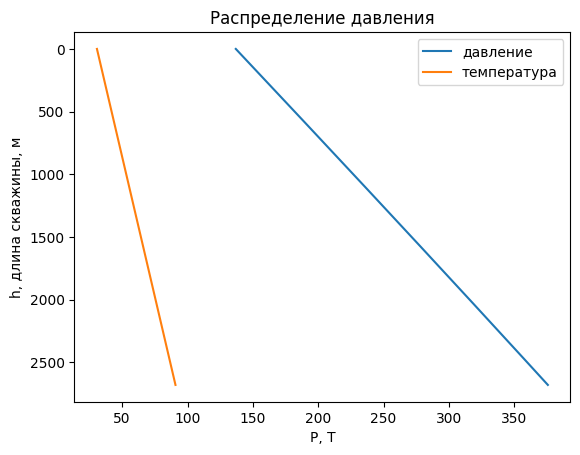

In [122]:
plt.plot(p_res, h_res, label ="давление")
plt.plot(t_res, h_res, label ="температура")
plt.xlabel("P, Т")
plt.ylabel("h, длина скважины, м")
ax = plt.gca()
ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")

# Инклинометрия скважины

In [123]:
def calc_sin_angle(md1: float, md2: float, incl: dict) -> float:
    """
    Расчет синуса угла с горизонталью по интерполяционной функции скважины

    Parameters
    ----------
    :param md1: measured depth 1, м
    :param md2: measured depth 2, м
    :param incl: словарь с данными инклинометрии {"md": [], "tvd": []}

    :return: синус угла к горизонтали
    """
    md = incl["md"]
    tvd = incl["tvd"]
    tube_func = interp1d(md, tvd, fill_value="extrapolate")
    return min((tube_func(md2) - tube_func(md1)) / (md2 - md1), 1)

def calc_angle(md1: float, incl: dict) -> float:
    """
    Функция для расчета угла наклона трубы в точке

    :param md1: measured depth 1, м
    :param incl: словарь с данными инклинометрии

    :return: угол наклона, градусы
    """
    md2 = md1 + 0.0001
    sin_angle = calc_sin_angle(md1, md2, incl)
    return np.degrees(np.arcsin(sin_angle))

def __integr_func_incl(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для интегрирования трубы с учетом инклинометрии

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl: словарь с данными инклинометрии
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиенты давления, Па/м и температуры, К/м
    """
    p, t = pt

    # Расчет текущего угла наклона
    current_angle = calc_angle(h, incl)

    # Расчет физических свойств воды
    ws = calc_ws(gamma_wat)
    rho_w = calc_rho_w(ws, t)
    mu_w = calc_mu_w(ws, t, p)

    # Расчет градиента давления с учетом реального угла
    dp_dl = calc_dp_dl(rho_w, mu_w, current_angle, q_ms, d_tub, roughness)

    # Расчет градиента температуры
    dT_dl = temp_grad * 1e-2

    return dp_dl, dT_dl

def calc_pipe_incl(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для расчета давления в трубе с учетом инклинометрии

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl: словарь с данными инклинометрии
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление, Па и температура, K, глубины
    """
    # Начальные условия
    y0 = [p_wh, t_wh]

    # Интегрирование от устья к перфорации с учетом инклинометрии
    sol = solve_ivp(
        lambda h, y: __integr_func_incl(
            h=h,
            pt=y,
            temp_grad=temp_grad,
            gamma_wat=gamma_wat,
            incl=incl,
            q_ms=q_ms,
            d_tub=d_tub,
            roughness=roughness
        ),
        t_span=(h0, md_vdp),
        y0=y0,
        method="RK45",
        rtol=1e-6,
        atol=1e-3,
        max_step=10.0
    )

    # Проверка решения
    if sol.status < 0 or len(sol.t) == 0:
        raise RuntimeError("Интегрирование не выполнено — пустое решение трубы")

    # Результаты
    h_res = sol.t
    p_res = sol.y[0]
    t_res = sol.y[1]

    return p_res, t_res, h_res

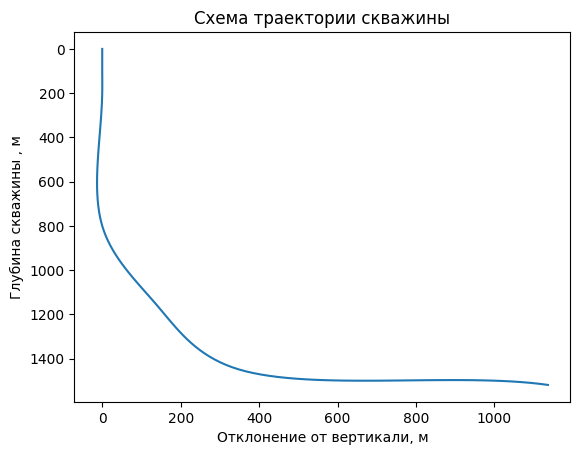

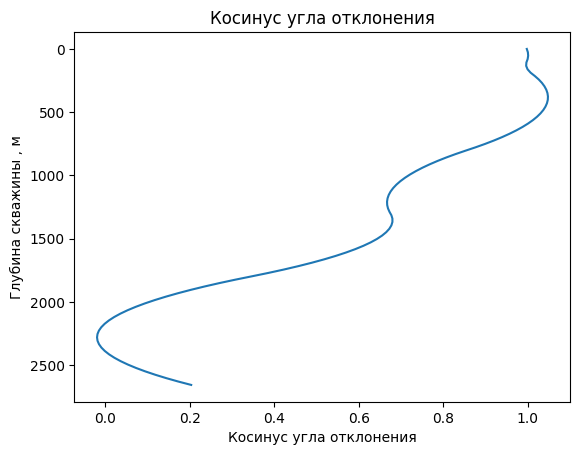

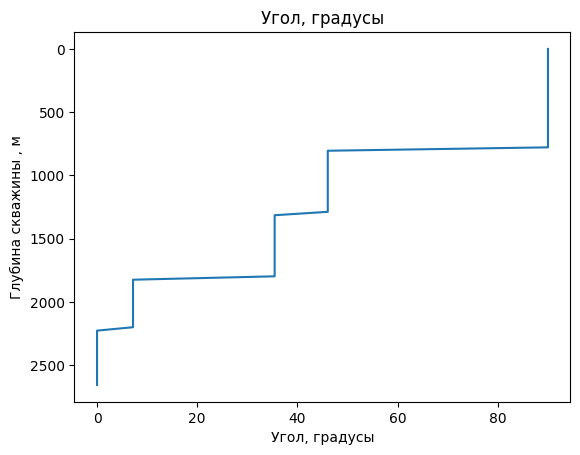

In [124]:
# траектория скважины, задается как массив измеренных глубин и значений отклонения от вертикали
h_md_ar_m = np.array([0,50,100,200,800,1300,1800,2200,2500])
h_tvd_ar_m = np.array([0,50,100,200,800,1160,1450,1500,1500])

# Подготовка данных по конструкции скважины
# удлинение от измеренной длины - для отрисовки графика
udl_m = interp1d(h_md_ar_m, h_md_ar_m-h_tvd_ar_m, kind='cubic', bounds_error=False, fill_value="extrapolate")

# вертикальная глубина от измеренной
h_tvd_m = interp1d(h_md_ar_m, h_tvd_ar_m, kind='cubic', bounds_error=False, fill_value="extrapolate")

# построим массив углов отклонения от вертикали
ang = np.arccos(np.diff(h_tvd_ar_m)/np.diff(h_md_ar_m))
# угол от измеренной глубины
ang_rad = interp1d(h_md_ar_m[:-1], ang, bounds_error=False, fill_value="extrapolate")
cos_ang1_rad = lambda h: ((h_tvd_m(h+1)-h_tvd_m(h)) ) #if h > 1 else  np.arccos((h_tvd_m(h+1)-h_tvd_m(h)) )


# готовим данные для отрисовки графика
h_ = np.linspace(0, H-25, num=100, endpoint=True)
plt.plot(udl_m(h_), h_tvd_m(h_), '-')
plt.xlabel("Отклонение от вертикали, м")
plt.ylabel("Глубина скважины , м")
plt.title("Схема траектории скважины")
ax = plt.gca()
ax.invert_yaxis()
plt.show()
plt.plot(cos_ang1_rad(h_), (h_), '-')
plt.xlabel("Косинус угла отклонения")
plt.ylabel("Глубина скважины , м")
plt.title("Косинус угла отклонения")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

incl = {
    "md": h_md_ar_m,
    "tvd": h_tvd_ar_m
}

angle = [calc_angle(h, incl) for h in h_]
plt.plot(angle, (h_), '-')
plt.xlabel("Угол, градусы")
plt.ylabel("Глубина скважины , м")
plt.title("Угол, градусы")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [131]:
def calc_sin_angle(md1: float, md2: float, incl:dict) -> float:
    """
    Расчет синуса угла с горизонталью по интерполяционной функции скважины

    Parameters
    ----------
    :param md1: measured depth 1, м
    :param md2: measured depth 2, м
    :param incl: словарь с данными инклинометрии {"md": [], "tvd": []}

    :return: синус угла к горизонтали
    """
    md = incl["md"]
    tvd = incl["tvd"]
    tube_func = interp1d(md, tvd, fill_value="extrapolate")
    return min((tube_func(md2) - tube_func(md1)) / (md2 - md1), 1)

def calc_angle(md1, incl):
    """
    Функция для расчета угла наклона трубы в точке

    :param md1: measured depth 1, м
    :param incl: словарь с данными инклинометрии
    """

    md2 = md1 + 0.0001
    return np.degrees(np.arcsin(calc_sin_angle(md1, md2, incl)))


def __integr_func_incl(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для интегрирования трубы с учетом инклинометрии

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl: словарь с данными инклинометрии
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиенты давления, Па/м и температуры, К/м
    """
    p, t = pt

    # Расчет текущего угла наклона по данным инклинометрии
    current_angle = calc_angle(h, incl)

    # Расчет физических свойств воды
    ws = calc_ws(gamma_wat)
    rho_w = calc_rho_w(ws, t)
    mu_w = calc_mu_w(ws, t, p)

    # Расчет градиента давления с учетом реального угла
    dp_dl = calc_dp_dl(rho_w, mu_w, current_angle, q_ms, d_tub, roughness)

    # Расчет градиента температуры
    dT_dl = temp_grad * 1e-2

    return dp_dl, dT_dl


def calc_pipe_incl(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для расчета давления в трубе с учетом инклинометрии

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl: словарь с данными инклинометрии
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление, Па и температура, K, глубины
    """
    # Начальные условия
    y0 = [p_wh, t_wh]

    # Интегрирование от устья к перфорации с учетом инклинометрии
    sol = solve_ivp(
        lambda h, y: __integr_func_incl(
            h=h,
            pt=y,
            temp_grad=temp_grad,
            gamma_wat=gamma_wat,
            incl=incl,
            q_ms=q_ms,
            d_tub=d_tub,
            roughness=roughness
        ),
        t_span=(h0, md_vdp),
        y0=y0,
        method="RK45",
        rtol=1e-6,
        atol=1e-3,
        max_step=10.0
    )

    # Проверка решения
    if sol.status < 0 or len(sol.t) == 0:
        raise RuntimeError("Интегрирование не выполнено — пустое решение трубы")
    # Результаты
    h_res = sol.t
    p_res = sol.y[0]
    t_res = sol.y[1]

    return p_res, t_res, h_res

In [132]:
h_md_ar_m = np.array([0,50,100,200,800,1300,1800,2200,2500])
h_tvd_ar_m = np.array([0,50,100,200,780,1160,1450,1500,1500])
incl = {
    "md": h_md_ar_m,
    "tvd": h_tvd_ar_m
}

In [133]:
results = calc_pipe_incl(p_wh, t_wh+273, h0=0, md_vdp=2000, temp_grad=temp_grad, gamma_wat=gamma_water, incl=incl, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
p_res = results[0] / 101325
t_res = results[1] - 273
h_res = results[2]

Построение графика распределения давления

Text(0.5, 1.0, 'Распределение давления')

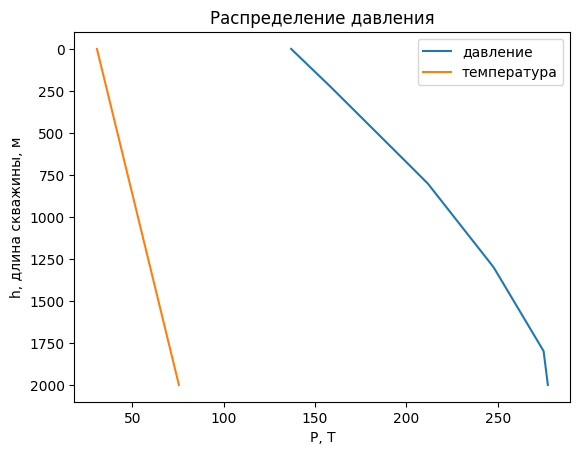

In [134]:
plt.plot(p_res, h_res, label ="давление")
plt.plot(t_res, h_res, label = "температура")
plt.xlabel("P, Т")
plt.ylabel("h, длина скважины, м")
ax = plt.gca()
ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")